# Eigenface implemetation

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import os
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
image_size = (250, 250)

def load_images(directory, num_images=16):
    images = []
    for filename in os.listdir(directory)[:num_images]:
        img = imread(os.path.join(directory, filename))
        if img is not None:
            # Convert to grayscale 
            if len(img.shape) == 3:
                img = rgb2gray(img)
            img_resized = resize(img, image_size, anti_aliasing=True)
            images.append(img_resized)
    return images

image_directory = 'Z:\AAIT\DSA\Face recognition\Datasets'
images = load_images(image_directory)


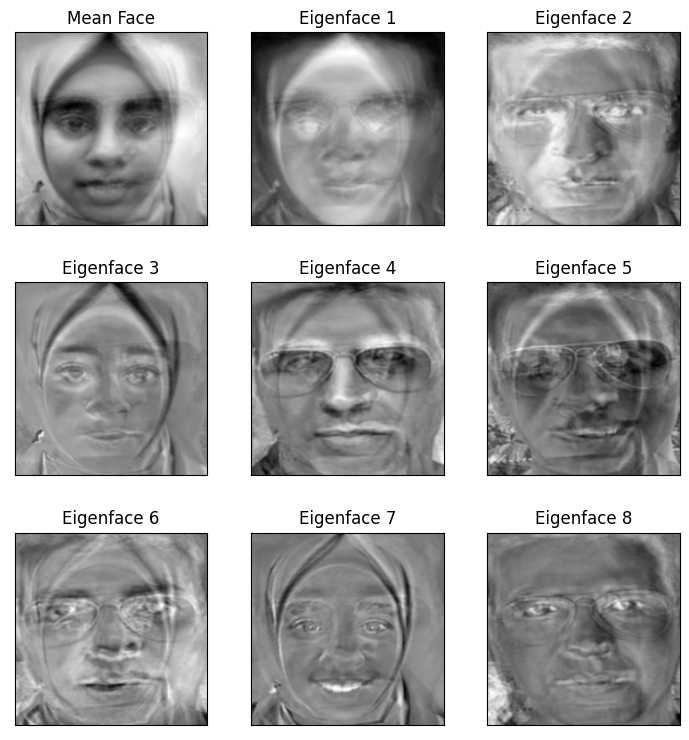

In [6]:
# Flatten the images
flat_images = [img.ravel() for img in images]
X = np.vstack(flat_images)

# Perform PCA
n_components = min(len(images), X.shape[1])
pca = PCA(n_components=n_components, whiten=True)
X_transformed = pca.fit_transform(X)

# Eigenfaces
eigenfaces = pca.components_.reshape((n_components, image_size[0], image_size[1]))

# Plotting the mean face and the first 8 eigenfaces
fig, axes = plt.subplots(3, 3, figsize=(9, 9),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.3, wspace=0.05))
for i, ax in enumerate(axes.flat):
    if i == 0:
        ax.imshow(pca.mean_.reshape(image_size), cmap='gray')
        ax.set_title("Mean Face")
    else:
        ax.imshow(eigenfaces[i - 1], cmap='gray')
        ax.set_title(f"Eigenface {i}")
plt.show()


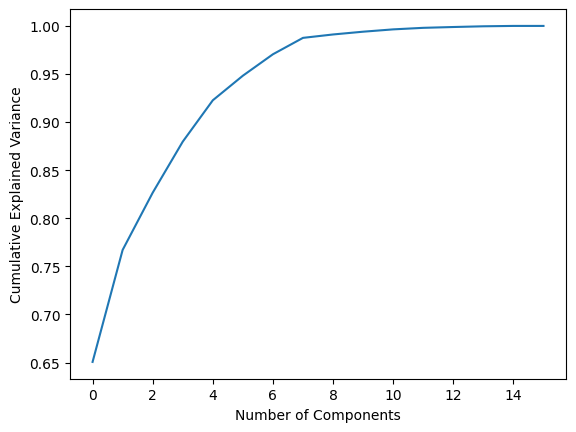

PCA(n_components=7)

In [7]:
pca = PCA().fit(flat_images) 

# Plot the cumulative variance to determine how many components to keep
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components that capture a high percentage of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1  # for 95% variance

# Now create a new PCA object with the determined number of components
pca = PCA(n_components=n_components)
pca.fit(flat_images)


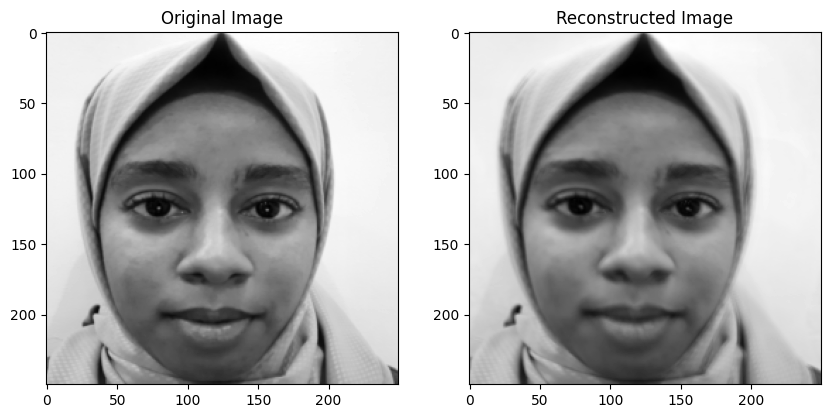

In [8]:
# Choose an image to reconstruct
image_idx = 0  # Change this to the index of the image you want to reconstruct
original_image = flat_images[image_idx]

# Project the original image onto the PCA space and reconstruct it
projection = pca.transform([original_image])
reconstruction = pca.inverse_transform(projection)

# Visualize the original and reconstructed image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(original_image.reshape(image_size), cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(reconstruction.reshape(image_size), cmap='gray')
ax[1].set_title('Reconstructed Image')
plt.show()


In [9]:
labels=[1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0]
# Assuming you have labels for your images
X_train, X_test, y_train, y_test = train_test_split(X_transformed, labels, test_size=0.2, random_state=42)

# Train a k-NN classifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

Accuracy: 0.75


# Fisherface implemetation

In [10]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import os

In [11]:
image_size = (250, 250)

def load_images(directory, num_images=16):
    images = []
    for filename in os.listdir(directory)[:num_images]:
        img = imread(os.path.join(directory, filename))
        if img is not None:
            # Convert to grayscale if necessary
            if len(img.shape) == 3:
                img = rgb2gray(img)
            img_resized = resize(img, image_size, anti_aliasing=True)
            images.append(img_resized)
    return images

image_directory = 'Z:\AAIT\DSA\Face recognition\Datasets'
images = load_images(image_directory)

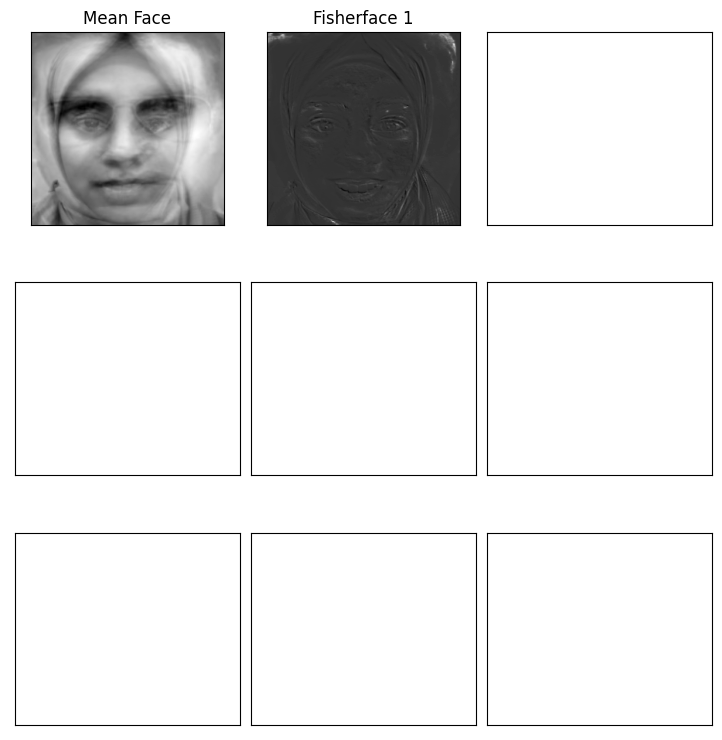

In [12]:
# Flatten the images
flat_images = [img.ravel() for img in images]
X = np.vstack(flat_images)

labels = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,0])  

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Perform LDA
# The number of components for LDA is min(n_classes - 1, n_features)
n_classes = np.unique(labels).shape[0]
lda = LDA(n_components=min(n_classes - 1, X_train.shape[1]))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Fisherfaces
fisherfaces = lda.scalings_.reshape((-1, image_size[0], image_size[1]))

# Plotting the mean face and the first 8 Fisherfaces
fig, axes = plt.subplots(3, 3, figsize=(9, 9),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.3, wspace=0.05))
for i, ax in enumerate(axes.flat):
    if i == 0:
        ax.imshow(lda.means_.mean(axis=0).reshape(image_size), cmap='gray')
        ax.set_title("Mean Face")
    elif i - 1 < fisherfaces.shape[0]:
        ax.imshow(fisherfaces[i - 1], cmap='gray')
        ax.set_title(f"Fisherface {i}")
plt.show()

In [13]:
# Train a k-NN classifier on the LDA-transformed data
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_lda, y_train)

# Predict on the LDA-transformed test set
y_pred = classifier.predict(X_test_lda)

# Print classification report
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy: 1.0
